<a href="https://colab.research.google.com/github/siddheshabhang/Academic-ERP/blob/master/ForestCover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
url = "https://raw.githubusercontent.com/siddheshabhang/Forest-Cover-Classifier/master/covtype.csv"
df = pd.read_csv(url)
df.shape

(581012, 55)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [72]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [73]:
print(df.columns.tolist())

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [74]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [75]:
df.nunique()


,0
Elevation,1978
Aspect,361
Slope,67
Horizontal_Distance_To_Hydrology,551
Vertical_Distance_To_Hydrology,700
Horizontal_Distance_To_Roadways,5785
Hillshade_9am,207
Hillshade_Noon,185
Hillshade_3pm,255
Horizontal_Distance_To_Fire_Points,5827


In [76]:
df['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


# **Exploratory Data Analysis**

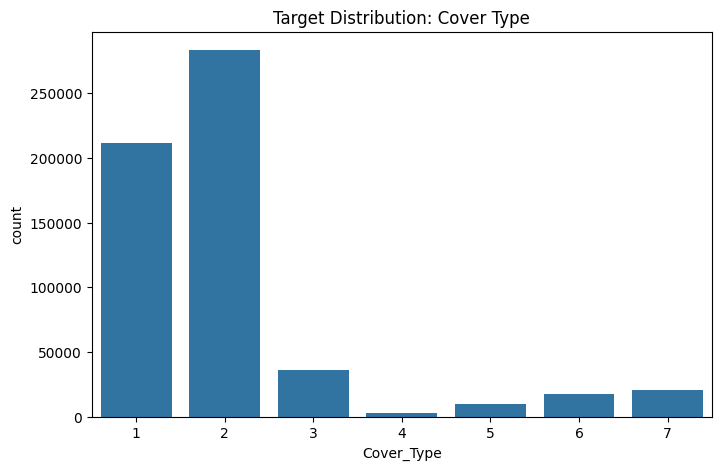

,proportion
Cover_Type,
2,0.487599
1,0.364605
3,0.061537
7,0.035300
6,0.029891
5,0.016339
4,0.004728


In [77]:
# Target Distribution (class imbalance check)
plt.figure(figsize=(8,5))
sns.countplot(x=df["Cover_Type"])
plt.title("Target Distribution: Cover Type")
plt.show()

df["Cover_Type"].value_counts(normalize=True)


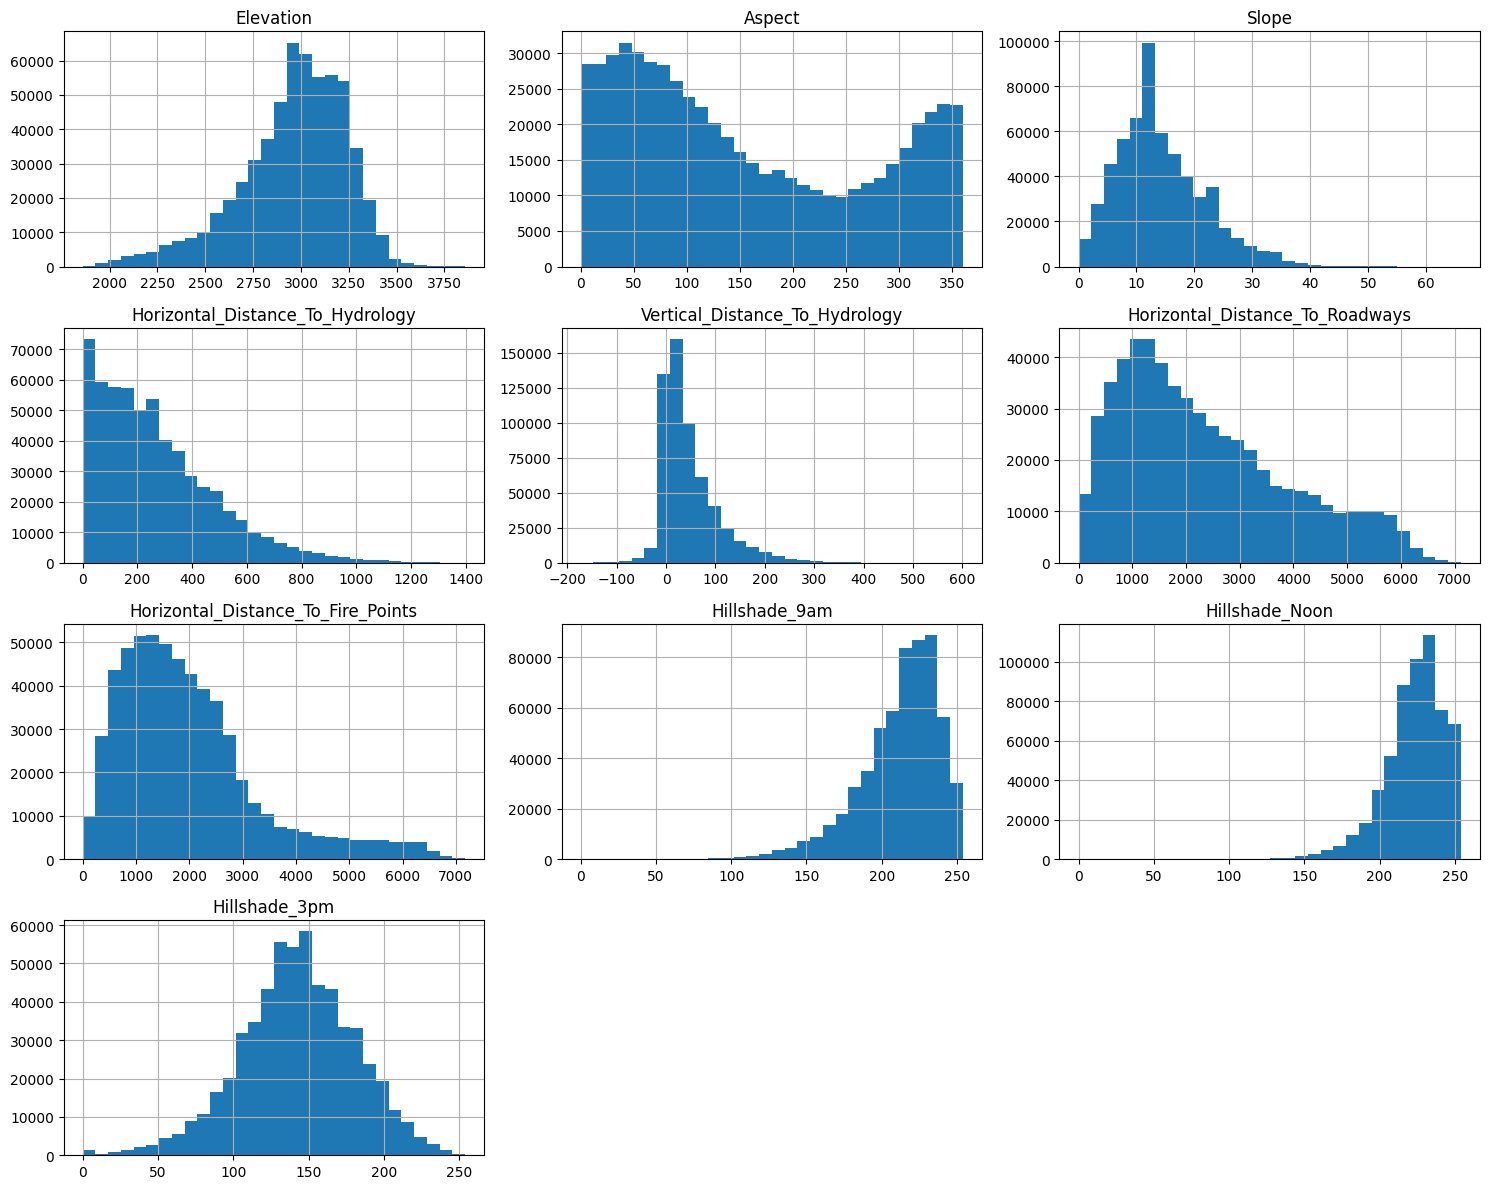

In [78]:
# Numerical Feature Distributions
num_cols = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"
]

df[num_cols].hist(bins=30, figsize=(15,12))
plt.tight_layout()
plt.show()


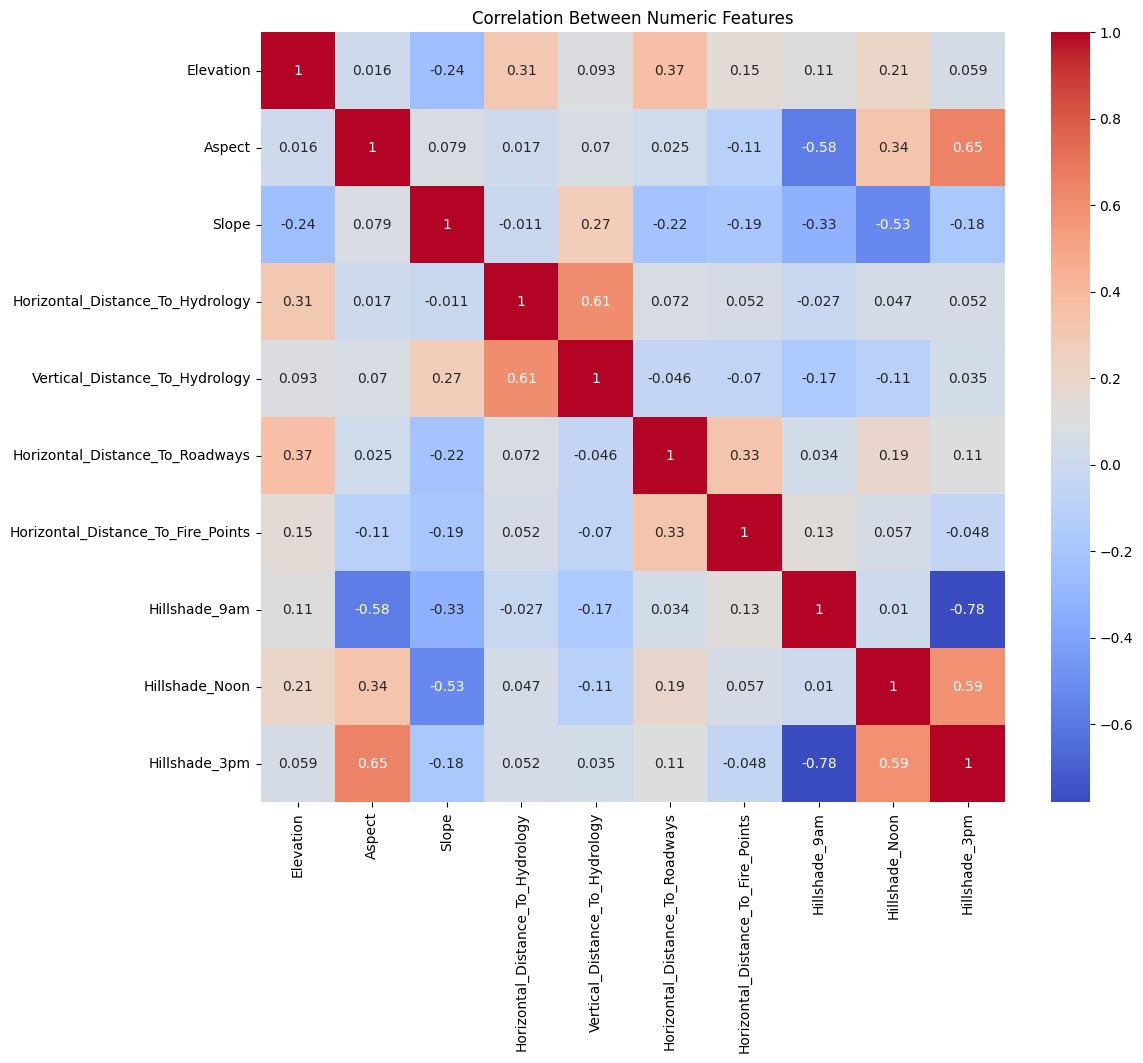

In [79]:
# Correlation Matrix (to identify strong predictors)
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


In [80]:
# Wilderness and Soil Feature Exploration
wild_cols = [c for c in df.columns if c.startswith("Wilderness_Area")]
df[wild_cols].sum()


,0
Wilderness_Area1,260796
Wilderness_Area2,29884
Wilderness_Area3,253364
Wilderness_Area4,36968


In [81]:
soil_cols = [c for c in df.columns if c.startswith("Soil_Type")]
df[soil_cols].sum().sort_values(ascending=False).head(10)

,0
Soil_Type29,115247
Soil_Type23,57752
Soil_Type32,52519
Soil_Type33,45154
Soil_Type22,33373
Soil_Type10,32634
Soil_Type30,30170
Soil_Type12,29971
Soil_Type31,25666
Soil_Type24,21278


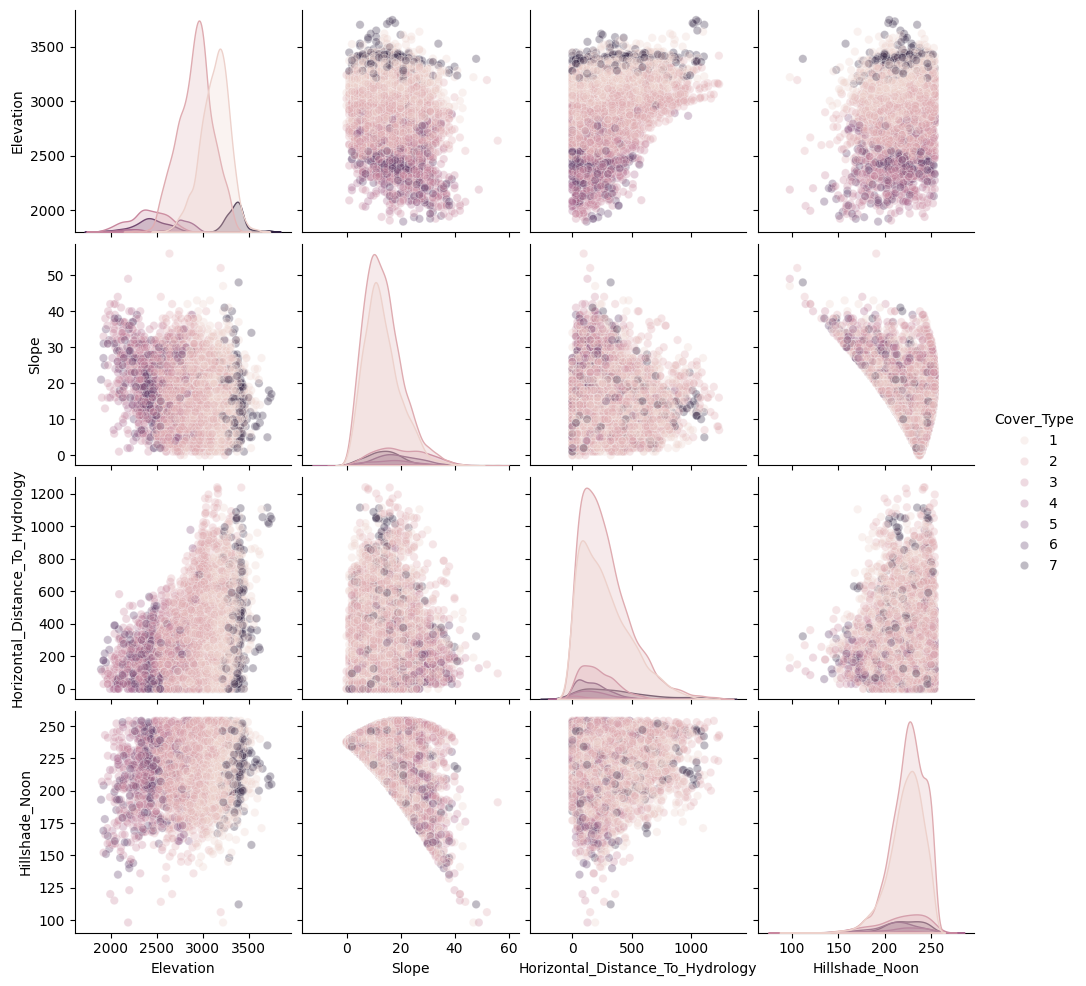

In [82]:
# Pairplots (sampled) — to check separability for SVM/NN
sample = df.sample(8000, random_state=42)

sns.pairplot(sample,
             vars=["Elevation", "Slope", "Horizontal_Distance_To_Hydrology", "Hillshade_Noon"],
             hue="Cover_Type",
             diag_kind="kde",
             plot_kws={'alpha':0.3})
plt.show()


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[num_cols] = scaler.fit_transform(df[num_cols])


# **Train Test Split**

In [84]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop("Cover_Type", axis=1)
y = df_scaled["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# **Baseline Models**

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=500
)

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.7233806356118172


## SVM (RBF Kernel)

In [ ]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', C=10, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_svm = svm_rbf.predict(X_test)
print("SVM (RBF) Accuracy:", accuracy_score(y_test, y_pred_svm))


## Neural Network (MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    learning_rate='adaptive',
    max_iter=50,
    random_state=42
)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
